In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from data_helper import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
log_name = "linear_regression"

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
for normalize in (True, False):
    check_on_dataset(LinearRegression, "lin_reg", log_name, normalize = normalize)

In [5]:
for normalize in (True, False):
    check_on_dataset(scaled_model, "scaled_lin_reg", log_name, final_model = LinearRegression, normalize = normalize)

In [6]:
pca_values = {'dist': 1, 'dist_time': 2, 'dist_remoteness': 6, 'full': 8, 'simd': 11}
for subset in pca_values.keys():
    fit_and_evaluate_ML_model(PCA_model, "pca_linreg", dataset_in, subset, log_name, final_model = LinearRegression, n_components = pca_values[subset])

We broadly see that normalization doesn't matter 

In [7]:
from sklearn.linear_model import Ridge

In [8]:
alpha_vals = [10**i for i in range(-5, 5)]

In [20]:
subset_scores = {}
for subset in subsets:
    subset_scores[subset] = []
    for alpha in alpha_vals:
        model = Ridge(alpha = alpha)
        model.fit(dataset_in["train"][subset], dataset_in["train"]["y"])
        subset_scores[subset].append((alpha, model.score(dataset_in["val"][subset], dataset_in["val"]["y"])))

In [21]:
subset_scores

{'simd': [(1e-05, 0.2158254279353773),
  (0.0001, 0.21582568632960997),
  (0.001, 0.2158282663332555),
  (0.01, 0.21585367470560268),
  (0.1, 0.2160706956738502),
  (1, 0.21594739766334936),
  (10, 0.19909511085585463),
  (100, 0.17210805455962552),
  (1000, 0.14990763109257232),
  (10000, 0.13329348164413324)],
 'dist': [(1e-05, 0.8896614675571946),
  (0.0001, 0.8896614675572081),
  (0.001, 0.8896614675573433),
  (0.01, 0.8896614675586956),
  (0.1, 0.8896614675722184),
  (1, 0.8896614677074457),
  (10, 0.8896614690596889),
  (100, 0.8896614825791138),
  (1000, 0.889661617472614),
  (10000, 0.8896629363443598)],
 'dist_time': [(1e-05, 0.9155975362641238),
  (0.0001, 0.9155975362640937),
  (0.001, 0.9155975362637931),
  (0.01, 0.9155975362607882),
  (0.1, 0.9155975362307387),
  (1, 0.9155975359301608),
  (10, 0.9155975329160124),
  (100, 0.9155975019379898),
  (1000, 0.9155971088600683),
  (10000, 0.9155851932562693)],
 'dist_remoteness': [(1e-05, 0.9246232905943194),
  (0.0001, 0.92462

We checked regularisation weights - don't seem to matter much apart from simd where larger values perform worse

In [11]:
for normalize in (True, False):
    check_on_dataset(Ridge, "ridge_reg", log_name, normalize = normalize)

In [12]:
for normalize in (True, False):
    check_on_dataset(scaled_model, "scaled_ridge_reg", log_name, final_model = Ridge, normalize = normalize)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
X_train = dataset_in["train"]["dist_time"]
y_train = dataset_in["train"]["y"]

X_val = dataset_in["val"]["dist_time"]
y_val = dataset_in["val"]["y"]

In [15]:
polynomial_scores = []

k = 0
best_score = -10e6
while k < 100:
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg", LinearRegression())])
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    polynomial_scores.append((k, score))
    k += 1
    if score > best_score:
        best_score = score
    else:
        break
    
polynomial_scores

[(0, -0.00015077984419842316),
 (1, 0.915597536264127),
 (2, 0.9270191309486405),
 (3, 0.9337808615328771),
 (4, 0.9365440748326076),
 (5, 0.9383213413060131),
 (6, 0.939303598197363),
 (7, 0.9396236667935738),
 (8, 0.8424197791156377)]

In [16]:
linreg_train_scores = []
linreg_val_scores = []

ridge_train_scores = []
ridge_val_scores = []
K = 10


for k in range(1, K):
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg", LinearRegression())])
    model.fit(X_train, y_train)
    linreg_train_scores.append(model.score(X_train, y_train))
    linreg_val_scores.append(model.score(X_val, y_val))
    print(model.named_steps["poly"].n_output_features_)


for k in range(1, K):
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg_reg", Ridge(alpha = 1))])
    model.fit(X_train, y_train)
    ridge_train_scores.append(model.score(X_train, y_train))
    ridge_val_scores.append(model.score(X_val, y_val))



4
10
20
35
56
84
120
165
220


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.499185e-18
  overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.270810e-23
  overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.797448e-28
  overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

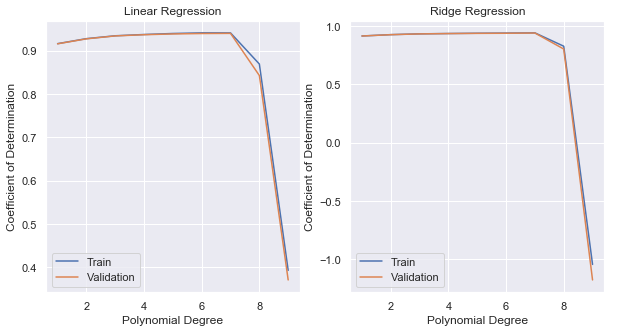

In [17]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

ax[0].plot(range(1, K), linreg_train_scores, label = "Train")
ax[0].plot(range(1, K), linreg_val_scores, label = "Validation")
ax[0].legend()
ax[0].title.set_text("Linear Regression")
ax[0].set_xlabel("Polynomial Degree")
ax[0].set_ylabel("Coefficient of Determination")

ax[1].plot(range(1, K), ridge_train_scores, label = "Train")
ax[1].plot(range(1, K), ridge_val_scores, label = "Validation")
ax[1].legend()
ax[1].title.set_text("Ridge Regression")
ax[1].set_xlabel("Polynomial Degree")
ax[1].set_ylabel("Coefficient of Determination")

plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\ML\poly_linreg.png", dpi = 300)

Best model: scaled linreg on full subset

In [18]:
best_model = scaled_model(final_model = LinearRegression)
best_model.fit(dataset_in["train"]["full"], dataset_in["train"]["y"])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ml_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

<BarContainer object of 49 artists>

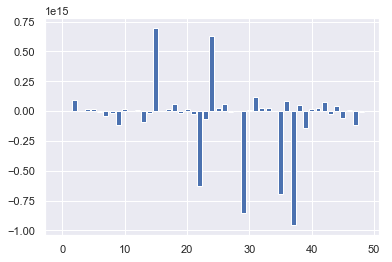

In [19]:
best_model_weights = best_model.named_steps["ml_model"].coef_
plt.bar(range(len(best_model_weights)), best_model_weights)